**EJERCICIO:**

Buscar un conjunto de datos a analizar

Explicar los datos y las variables disponibles en el conjunto de datos seleccionado

Realizar un EDA sencillo poniendo en práctica los conocimientos adquiridos hasta el momento.

Interpretación de los resultados.

In [1]:
import numpy as np
import pandas as pd
import sidetable as stb

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer
import math

import warnings
warnings.filterwarnings("ignore")

pd.options.display.max_columns = None 

In [2]:
df_travel = pd.read_csv("data/travel insurance.csv")
df_travel.sample(5)

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
5916,EPX,Travel Agency,Online,Cancellation Plan,No,8,CHINA,10.0,0.00,NaN,36
45862,C2B,Airlines,Online,Annual Silver Plan,No,367,SINGAPORE,216.0,54.00,M,56
46839,EPX,Travel Agency,Online,Cancellation Plan,No,91,JAPAN,46.0,0.00,NaN,36
25985,EPX,Travel Agency,Online,Cancellation Plan,No,41,HONG KONG,18.0,0.00,NaN,36
57582,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,11,THAILAND,39.6,23.76,NaN,45


In [3]:
# comprobamos cantidad de datos
df_travel.shape

(63326, 11)

In [4]:
# comprobamos tipo de datos

df_travel.dtypes

Agency                   object
Agency Type              object
Distribution Channel     object
Product Name             object
Claim                    object
Duration                  int64
Destination              object
Net Sales               float64
Commision (in value)    float64
Gender                   object
Age                       int64
dtype: object

In [5]:
# comprobamos nulos
df_travel.stb.missing()

,missing,total,percent
Gender,45107,63326,71.229827
Agency,0,63326,0.000000
Agency Type,0,63326,0.000000
Distribution Channel,0,63326,0.000000
Product Name,0,63326,0.000000
Claim,0,63326,0.000000
Duration,0,63326,0.000000
Destination,0,63326,0.000000
Net Sales,0,63326,0.000000
Commision (in value),0,63326,0.000000


In [6]:
# hay una columna con más de un 70% de nulos, la eliminamos porque no nos aporta valor añadido

df_travel= df_travel.drop("Gender", axis= 1)
df_travel.sample()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
34490,EPX,Travel Agency,Online,Cancellation Plan,No,32,THAILAND,17.0,0.0,30


In [7]:
# comprobamos duplicados

df_travel.duplicated().sum()

8670

In [8]:
# creamos un df sólo con los duplicados para explorarlos

df_travel_dupli = df_travel[df_travel.duplicated()]
df_travel_dupli.sample(5)

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
12759,EPX,Travel Agency,Online,2 way Comprehensive Plan,No,6,CHINA,34.0,0.0,36
24740,JZI,Airlines,Online,Basic Plan,No,7,MALAYSIA,18.0,6.3,53
9210,EPX,Travel Agency,Online,Cancellation Plan,No,32,SINGAPORE,10.0,0.0,36
48257,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,22,AUSTRALIA,49.5,29.7,31
53981,C2B,Airlines,Online,Bronze Plan,No,5,SINGAPORE,16.0,4.0,27


### NOTAS:

- son datos tan genéricos que puede que haya 2 personas de 25 años que hayan viajado al mismo destino durante el mismo periodo (viajes organizados por ejemplo)

- vemos que hay registros con una edad de 118, vamos a explorarlos

In [9]:
df_travel[df_travel["Age"]== 118] 

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
10,JZI,Airlines,Online,Basic Plan,No,33,"KOREA, DEMOCRATIC PEOPLE'S REPUBLIC OF",-26.0,9.10,118
105,JWT,Airlines,Online,Value Plan,No,11,INDIA,50.0,20.00,118
220,JWT,Airlines,Online,Value Plan,No,4,INDIA,62.0,24.80,118
367,JWT,Airlines,Online,Value Plan,No,16,INDIA,50.0,20.00,118
402,CCR,Travel Agency,Offline,Comprehensive Plan,No,5,MALAYSIA,29.0,9.57,118
...,...,...,...,...,...,...,...,...,...,...
62920,JWT,Airlines,Online,Value Plan,No,2,INDIA,31.0,12.40,118
62953,ART,Airlines,Online,Value Plan,No,14,FRANCE,59.0,20.65,118
63096,ART,Airlines,Online,Value Plan,No,42,HONG KONG,61.0,21.35,118
63182,JWT,Airlines,Online,Value Plan,No,21,INDIA,39.0,15.60,118


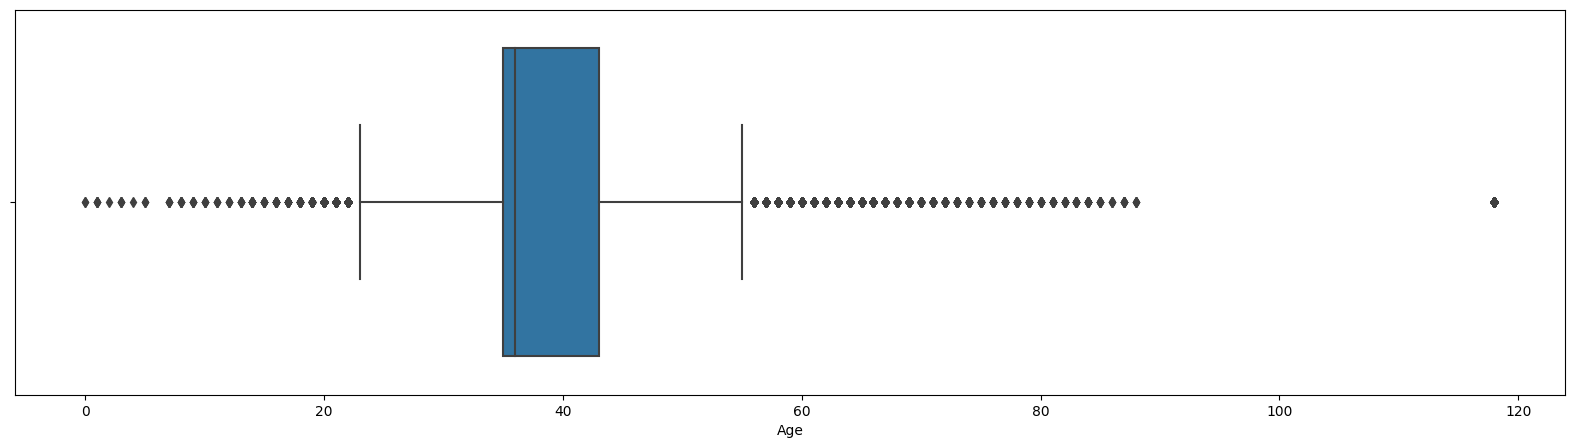

In [10]:
# exploramos outliers de la columa age:

plt.figure(figsize = (20,5))
sns.boxplot(data = df_travel, x = "Age");

<Axes: xlabel='Age', ylabel='Count'>

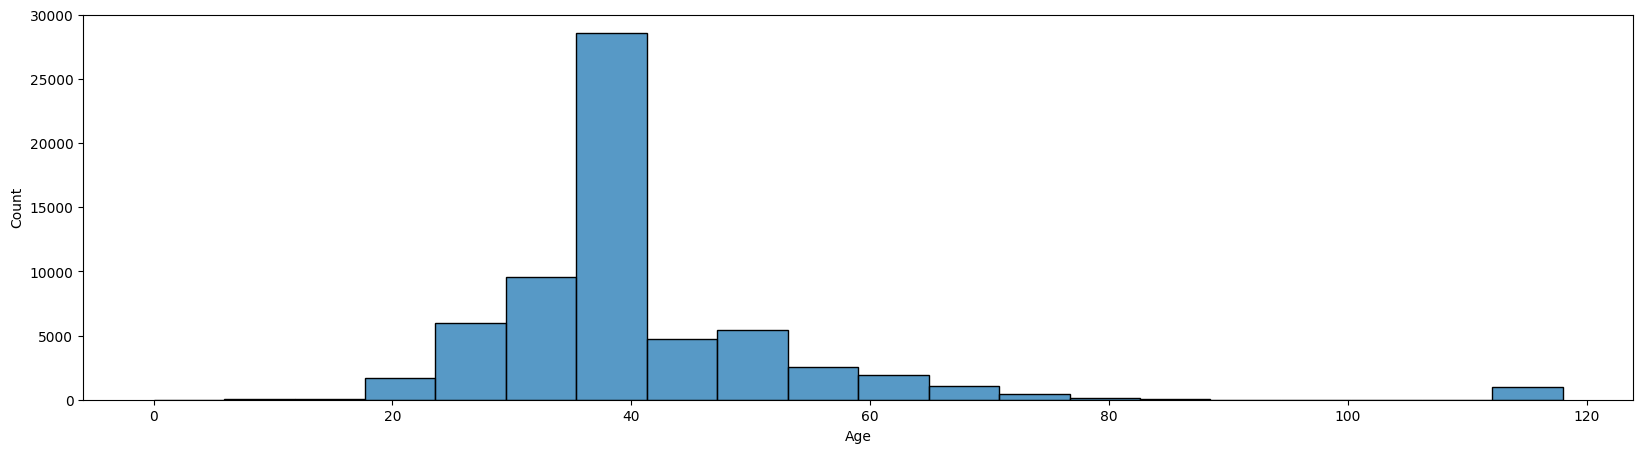

In [11]:
# exploramos la distribución de las edades

plt.figure(figsize = (20,5))
sns.histplot(data = df_travel, x = "Age", bins = 20)

Como vemos que los datos van disminuyendo en gran medida a medida que nos acercamos a los outliers, no los gestionaremos, salvo el valor de 118 años de edad que lo consideramos un error y lo sustituiremos.

In [12]:
df_travel["Age"].unique()

array([ 81,  71,  32,  41,  44,  29,  37, 118,  47,  48,  64,  36,  53,
        43,  58,  25,  34,  26,  30,  33,  35,  31,  61,  20,  46,  49,
        50,  62,  65,  24,  40,  21,  66,  57,  45,  52,  60,  27,  23,
        39,  59,  28,  67,  38,  72,  51,  55,  54,  69,  22,  78,  42,
        70,  68,  77,  63,  56,  79,  76,  16,  14,  73,  18,  19,  74,
        85,  84,  13,  75,  87,  80,  83,  12,  10,   8,  17,  15,   9,
        11,  86,   3,  82,   1,   5,  88,   2,   4,   0,   7])

In [13]:
# Cambiamos los registros a np.nan para poder gestionarlos

df_travel['Age'] = df_travel['Age'].replace(118, np.nan)

In [14]:
# El outlier de 118 lo imputaremos mediante el método KNN para que nos lo cambie por la media de sus vecinos

imputerKNN = KNNImputer(n_neighbors=5)
imputerKNN.fit(df_travel[['Age']])
age_knn= imputerKNN.transform(df_travel[['Age']])
df_age = pd.DataFrame(age_knn, columns = ['Age'])

In [15]:
# cambiamos la columna en el df original

df_travel['Age'] = df_age['Age']

In [16]:
# comprobamos el valor completo que nos devuelve el método knn

pd.DataFrame(df_travel['Age'].value_counts()).index

Index([             36.0,              31.0,              48.0,
                    35.0,              30.0,              28.0,
                    29.0,              33.0,              32.0,
                    27.0,              34.0,              37.0,
                    26.0, 38.73836258060376,              39.0,
                    38.0,              45.0,              41.0,
                    43.0,              46.0,              42.0,
                    40.0,              44.0,              25.0,
                    47.0,              49.0,              53.0,
                    24.0,              51.0,              50.0,
                    52.0,              54.0,              57.0,
                    23.0,              56.0,              22.0,
                    55.0,              58.0,              59.0,
                    60.0,              61.0,              21.0,
                    63.0,              62.0,              64.0,
                    65.0,              6

In [17]:
# Redondeamos al alza el valor que hemos recibido de KNN

df_travel['Age'] = df_travel['Age'].apply(lambda col:math.ceil(col))

Exploramos nuestra variable respuesta:

In [18]:
value_counts = df_travel["Claim"].value_counts()

<Axes: ylabel='count'>

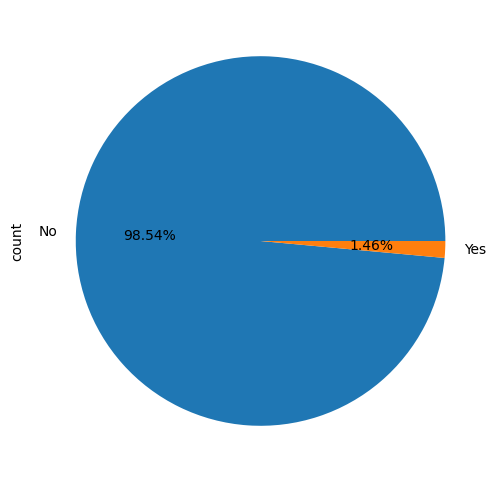

In [19]:
#Hacemos un pie de nuestra variable respuesta
value_counts.plot.pie(figsize=(6,6), autopct='%1.2f%%' )

CONCLUSIÓN: 

Nuestra variable respuesta no está balanceada, casi la totalidad de los datos corresponden a la subcategoría "no" (no presentaron reclamaciones)

In [20]:
# creamos dos df distintos: Uno para categóricas y otro para variables numéricas

df_num = df_travel.select_dtypes(include= np.number)
df_cat = df_travel.select_dtypes(exclude= np.number)

In [21]:
df_num

,Duration,Net Sales,Commision (in value),Age
0,186,-29.0,9.57,81
1,186,-29.0,9.57,71
2,65,-49.5,29.70,32
3,60,-39.6,23.76,32
4,79,-19.8,11.88,41
...,...,...,...,...
63321,111,35.0,12.25,31
63322,58,40.0,14.00,40
63323,2,18.0,6.30,57
63324,3,18.0,6.30,63


Exploramos Variables Predictoras:

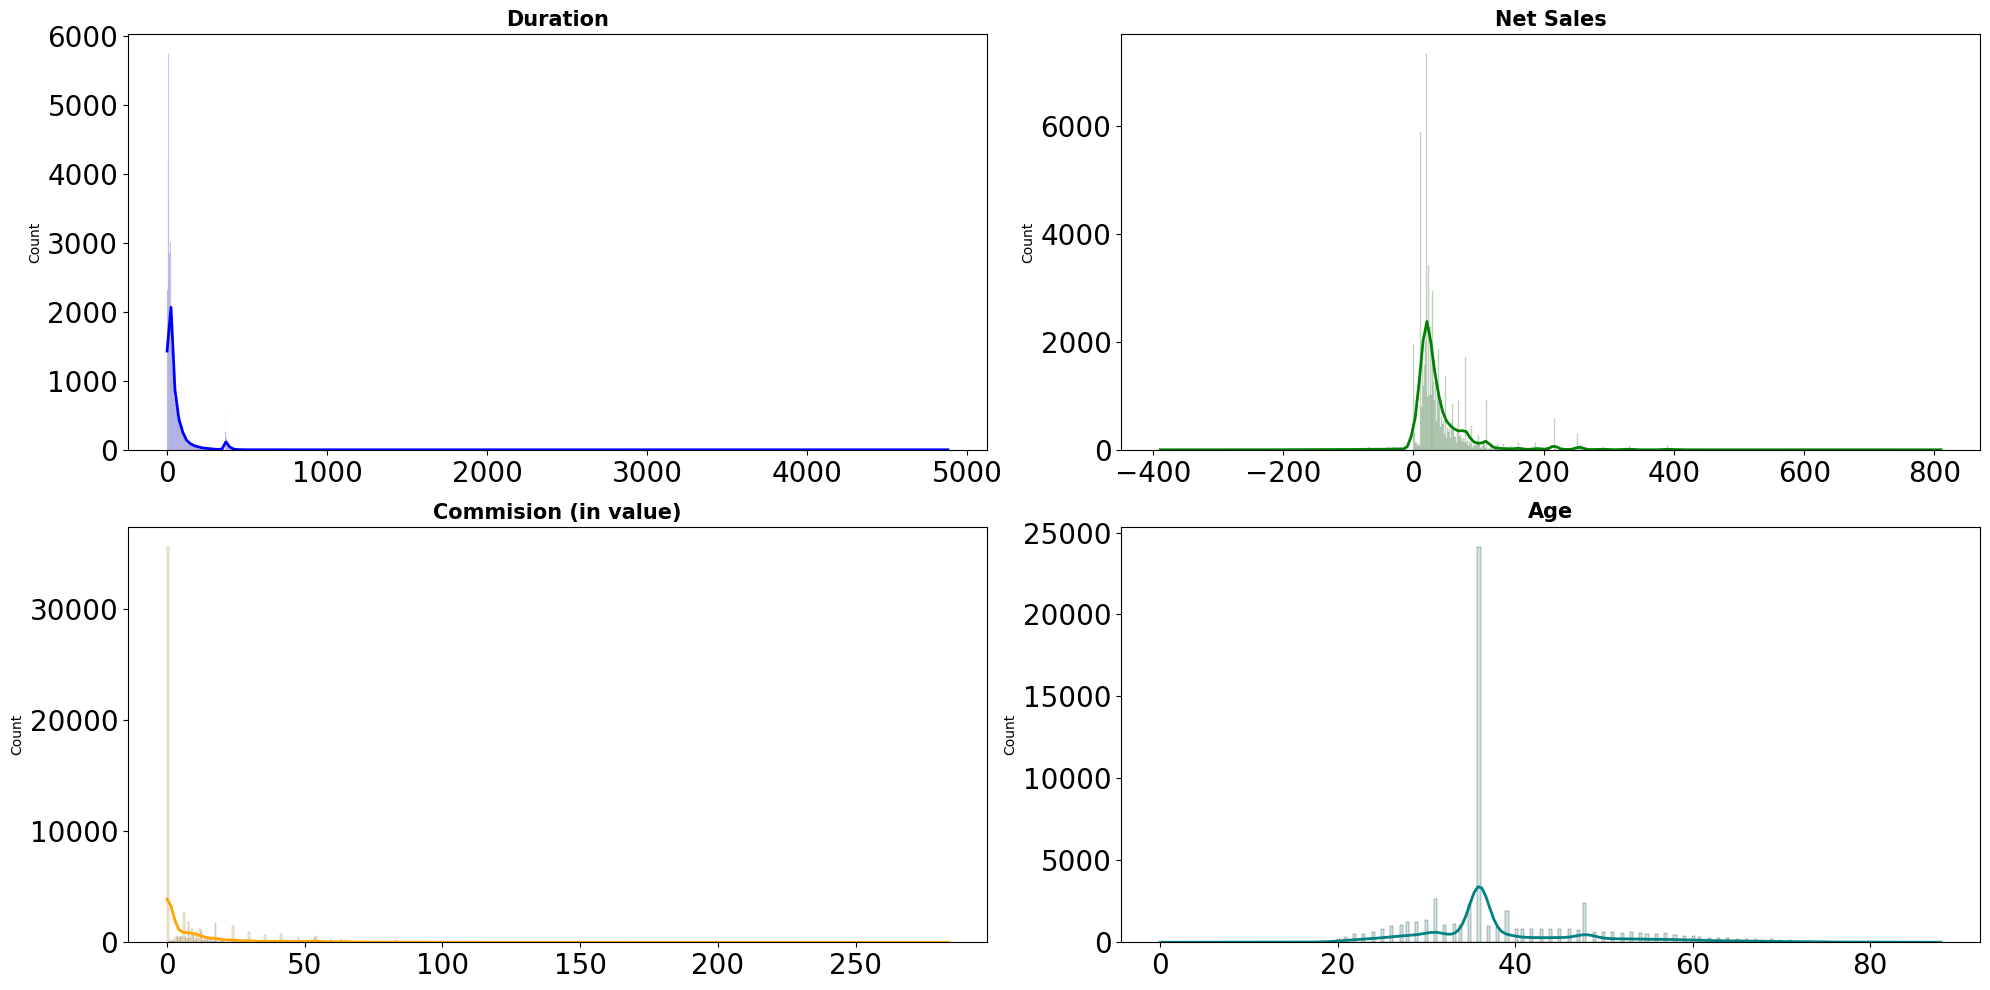

In [22]:
# NUMÉRICAS:

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 10))
lista_colores = ["blue", "green", "orange", "teal"]

axes = axes.flat
columnas_numeric = df_num.select_dtypes(include = np.number).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data = df_travel,
        x = colum,
        kde = True,
        color = lista_colores[i],
        line_kws = {"linewidth": 2},
        alpha = 0.2,
        ax = axes[i])
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
fig.tight_layout();

CONCLUSIONES:

- Vemos que hay valores inusuales en la duración de los viajes, net sales y en commisiones así que pasamos a explorarlos más tarde.

- Como ya habíamos visto, la edad media de los clientes está cerca al 36.

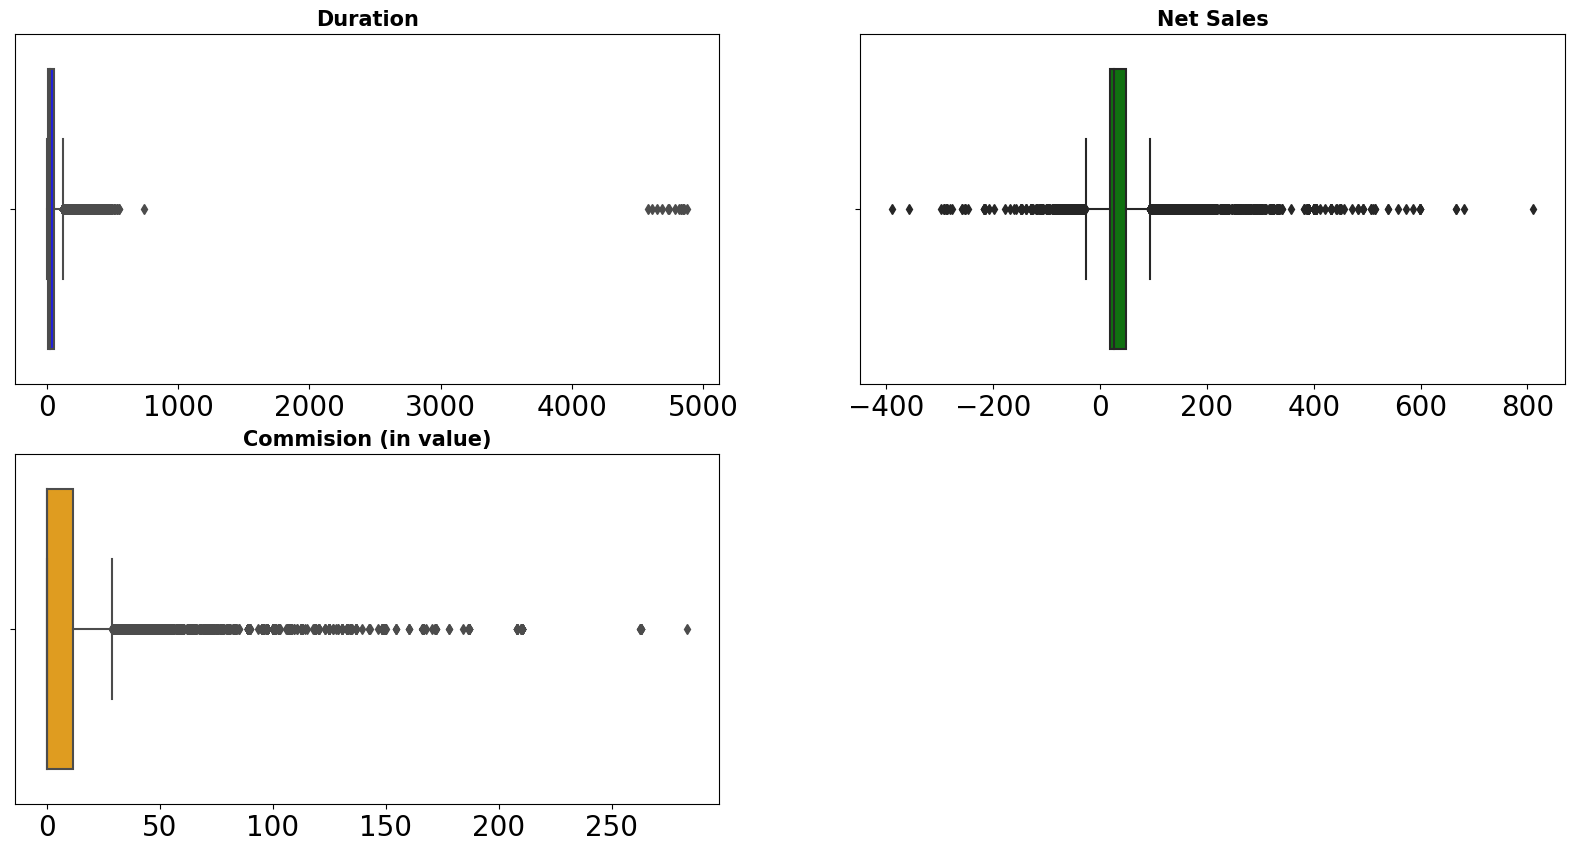

In [23]:
# exploramos outliers

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 10))
lista_colores = ["blue", "green", "orange", "teal"]

axes = axes.flat
columnas_numeric = df_num.select_dtypes(include = np.number).columns

for i, colum in enumerate(columnas_numeric):
    sns.boxplot(
        data = df_travel,
        x = colum,
        color = lista_colores[i],
        ax = axes[i])
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

fig.delaxes(axes[-1]);

CONCLUSION:

- La duración del viaje obviamente hay valores que no son normales.¿son datos correctos? ¿pueden ser vuelos sólo de ida?

- En cuanto al net_value que es el dinero que la agencia recibe vemos bastantes negativos lo que nos hace pensar que puedan ser ofertas o descuentos donde la compañía no genera ingresos activos (quizás pasivos) o son datos incorrectos. ¿pueden ser seguros a sus propios empleados para conocer destinos?

- Las comisiones de las aseguradoras mayoritariamentos son nulas. Nos hace pensar que sería recomdable hacer dos estudios o separarlas por dos grupos (con comisión y sin comisión)

In [24]:
# creamos una funcion para categorizar las comisiones y, de paso, para gestionar los outliers

def cat (col):

    """Esta función nos categoriza la columna que elijamos

    Returns:
        no: cambia todos los 0 por no
        yes: cambia cualquier valor por yes
    """

    if col == 0:

        return "no"
    
    else:
        return "yes"

In [25]:
df_travel["Commision"] = df_travel["Commision (in value)"].apply(cat)

In [26]:
#Eliminamos la columna original

df_travel = df_travel.drop('Commision (in value)', axis = 1)

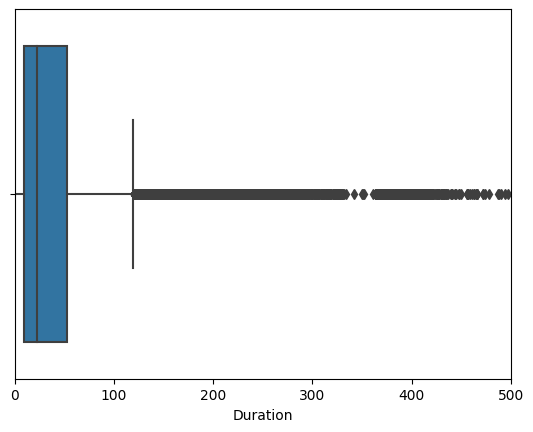

In [27]:
# analizamos más a fondo la columna Duration

sns.boxplot(x= "Duration", data= df_travel)
plt.xlim([0, 500]);

In [28]:
df_travel[df_travel["Duration"] > 365].count()

Agency                  1329
Agency Type             1329
Distribution Channel    1329
Product Name            1329
Claim                   1329
Duration                1329
Destination             1329
Net Sales               1329
Age                     1329
Commision               1329
dtype: int64

Eliminamos los utliers que pasen de 1 año, teniendo en cuenta visados de estudiantes o de trabajo que suelen pedir viaje de vuelta. Además, por lo general, no se venden billetes a más de un año vista.

In [29]:
# sacamos los indices de los outliers y los eliminamos del df

lista_365= df_travel[df_travel["Duration"] > 365].index.tolist()
df_travel = df_travel.drop(df_travel.index[lista_365])

In [30]:
# corroboramos que se han eliminado

df_travel.shape

(61997, 10)

<Axes: xlabel='Net Sales'>

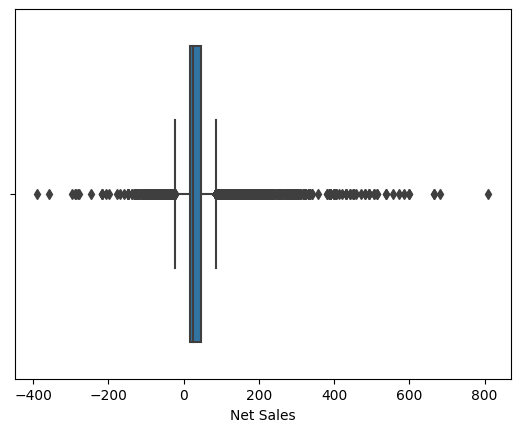

In [31]:
# exploramos los outliers de la columna Net Sales

sns.boxplot(x= "Net Sales", data= df_travel)

In [32]:
df_num.stb.freq(["Net Sales"])

,Net Sales,count,percent,cumulative_count,cumulative_percent
0,20.0,5988,9.455832,5988,9.455832
1,10.0,4748,7.497710,10736,16.953542
2,22.0,2343,3.699902,13079,20.653444
3,0.0,1884,2.975081,14963,23.628525
4,18.0,1643,2.594511,16606,26.223036
...,...,...,...,...,...
1134,-287.4,1,0.001579,63322,99.993683
1135,-289.0,1,0.001579,63323,99.995263
1136,-297.0,1,0.001579,63324,99.996842
1137,-357.5,1,0.001579,63325,99.998421


In [33]:
#Sustituimos los Outliers de las columnas Net Sales y Comission por la mediana


#calculamos los cuartiles Q1 y Q3
Q1 = np.nanpercentile(df_travel['Net Sales'], 25)
Q3 = np.nanpercentile(df_travel['Net Sales'], 75)

# calculamos el rango intercuartil
IQR = Q3 - Q1
# calculamos los límites
outlier_step = 1.5 * IQR
# filtramos nuestro dataframe para indentificar los outliers
outliers_data = df_travel[(df_travel['Net Sales'] < Q1 - outlier_step) | (df_travel['Net Sales'] > Q3 + outlier_step)]

#Sacamos la lista de los indices del dataframe con los outliers
lista_net = list(outliers_data.index) 




In [34]:
media_net = df_travel['Net Sales'].mean()

for element in lista_net:
    df_travel.loc[element, 'Net Sales'] = media_net

<Axes: xlabel='Net Sales'>

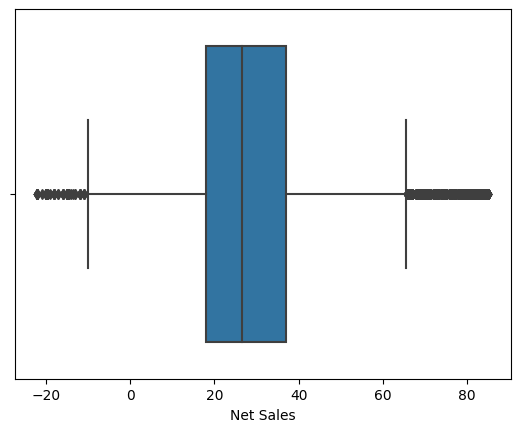

In [35]:
sns.boxplot(x= "Net Sales", data= df_travel)

<Axes: >

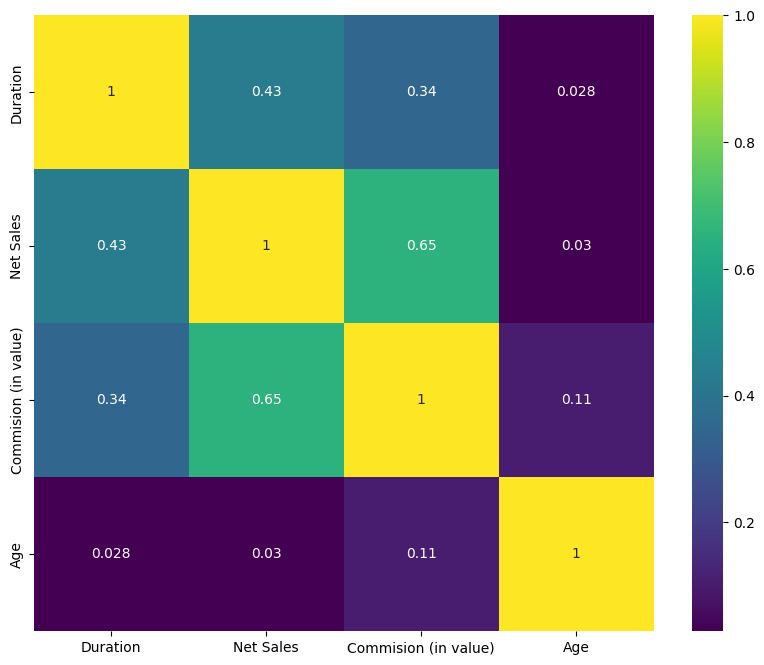

In [36]:
plt.figure(figsize=(10,8))

sns.heatmap(df_num.corr(), cmap="viridis", annot= True)

Vemos en el heatmap que no hay ninguna relación aparente entre las variables numéricas

In [37]:
#Volvemos a crear los dataframe de categóricas y numéricas, después de categorizar la columna Comission

df_cat = df_travel.select_dtypes(exclude= np.number)
df_num = df_travel.select_dtypes(include= np.number)


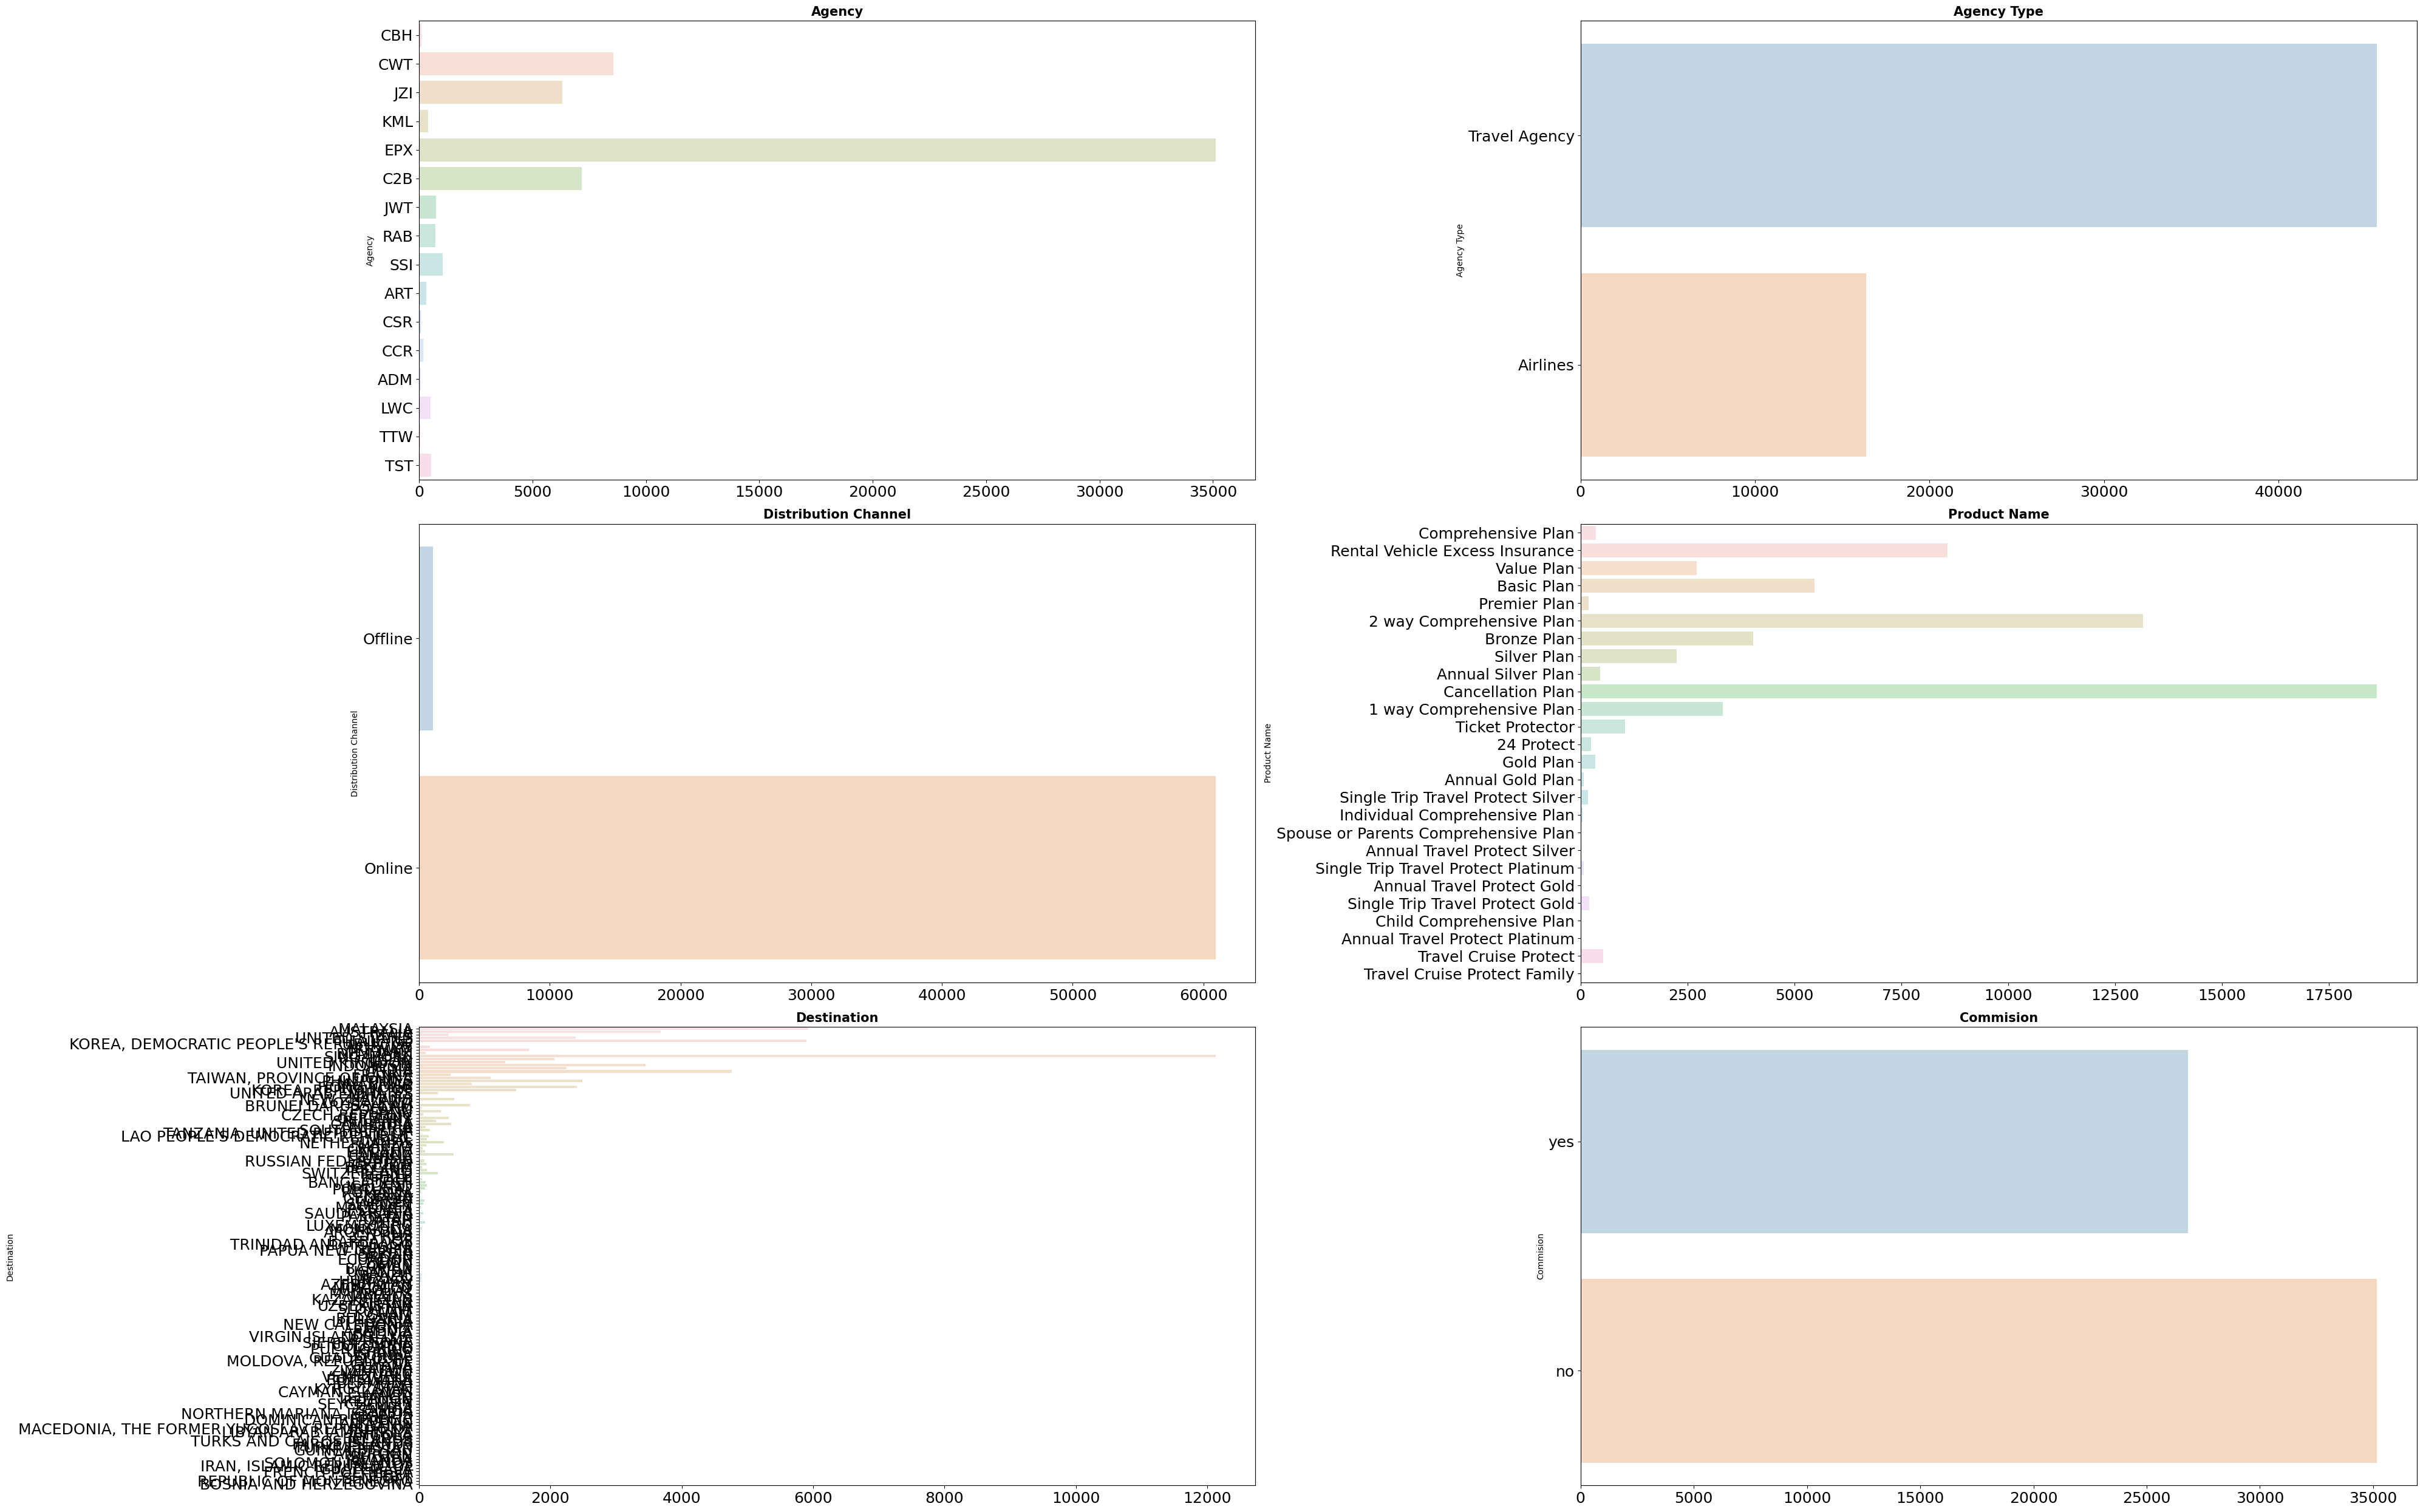

In [38]:
# CATEGÓRICAS:

fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (40, 25))
axes = axes.flat

columnas_cat = df_cat.drop("Claim", axis= 1).columns

for i, colum in enumerate(columnas_cat):
    sns.countplot(
        data = df_travel,
        y = colum,
        alpha = 0.3,
        ax = axes[i])
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 18)
    axes[i].set_xlabel("")

fig.tight_layout();

CONCLUSIONES:


- La agencia que más se contrata es EPX

- El tipo de agencia más usado según esto datos claramente es la agencia de viajes de manera online

- Los productos más contratados son el plan de cancelación y el 2 way comprehensive plan así como el rental vehicle excess insurance

- Se debe profundizar en la columna destinatio. ¿Hay repetidos? ¿se pueden agrupar?

In [54]:
#Exploramos la columna Destination

df_cat.stb.freq(["Destination"], thresh=80)

,Destination,count,percent,cumulative_count,cumulative_percent
0,SINGAPORE,12128,19.562237,12128,19.562237
1,MALAYSIA,5929,9.563366,18057,29.125603
2,THAILAND,5894,9.506912,23951,38.632514
3,CHINA,4757,7.672952,28708,46.305466
4,AUSTRALIA,3683,5.940610,32391,52.246076
5,INDONESIA,3445,5.556720,35836,57.802797
6,PHILIPPINES,2490,4.016323,38326,61.819120
7,HONG KONG,2408,3.884059,40734,65.703179
8,UNITED STATES,2389,3.853412,43123,69.556591
9,INDIA,2251,3.630821,45374,73.187412


In [40]:
from itertools import combinations
import researchpy as rp

In [41]:
df_travel.head(1)

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Age,Commision
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,36.782695,81,yes


In [42]:
#Creamos una lista con todas las combinaciones posibles de columnas para poder hacer el crosstab

predictoras = df_cat.columns.drop('Claim')
combinaciones = list(combinations(predictoras, 2))

In [43]:
combinaciones[0]

('Agency', 'Agency Type')

In [59]:
#Realizamos un crosstab para ver la relación entre las variables categóricas

for col in df_cat.columns:
    crosstab= rp.crosstab(df_cat[col], df_cat['Claim'], prop = 'row')
        
    display(crosstab)
        

Claim             
Claim       No   Yes    All
Agency                     
ADM     100.00  0.00  100.0
ART      99.70  0.30  100.0
C2B      93.92  6.08  100.0
CBH      99.01  0.99  100.0
CCR      98.45  1.55  100.0
CSR      98.84  1.16  100.0
CWT      99.00  1.00  100.0
EPX      99.44  0.56  100.0
JWT      99.47  0.53  100.0
JZI      99.51  0.49  100.0
KML      97.96  2.04  100.0
LWC      95.22  4.78  100.0
RAB      99.86  0.14  100.0
SSI      99.33  0.67  100.0
TST      99.62  0.38  100.0
TTW      94.64  5.36  100.0
All      98.70  1.30  100.0

Claim             
Claim             No   Yes    All
Agency Type                      
Airlines       97.06  2.94  100.0
Travel Agency  99.29  0.71  100.0
All            98.70  1.30  100.0

Claim             
Claim                    No   Yes    All
Distribution Channel                    
Offline               98.50  1.50  100.0
Online                98.71  1.29  100.0
All                   98.70  1.30  100.0

Claim              
Claim                                     No    Yes    All
Product Name                                              
1 way Comprehensive Plan               99.73   0.27  100.0
2 way Comprehensive Plan               98.92   1.08  100.0
24 Protect                            100.00   0.00  100.0
Annual Gold Plan                       88.31  11.69  100.0
Annual Silver Plan                     87.15  12.85  100.0
Annual Travel Protect Gold             82.61  17.39  100.0
Annual Travel Protect Platinum         92.86   7.14  100.0
Annual Travel Protect Silver          100.00   0.00  100.0
Basic Plan                             99.58   0.42  100.0
Bronze Plan                            94.81   5.19  100.0
Cancellation Plan                      99.76   0.24  100.0
Child Comprehensive Plan              100.00   0.00  100.0
Comprehensive Plan                     98.63   1.37  100.0
Gold Plan                              94.89   5.11  100.0
Individual Comprehensive Plan          93.18   6.82  100.0
Premier Plan                           98.45   1.55  100.0
Rental Vehicle Excess Insurance        99.00   1.00  100.0
Silver Plan                            93.73   6.27  100.0
Single Trip Travel Protect Gold        95.10   4.90  100.0
Single Trip Travel Protect Platinum    93.15   6.85  100.0
Single Trip Travel Protect Silver      97.69   2.31  100.0
Spouse or Parents Comprehensive Plan  100.00   0.00  100.0
Ticket Protector                       99.33   0.67  100.0
Travel Cruise Protect                  99.62   0.38  100.0
Travel Cruise Protect Family          100.00   0.00  100.0
Value Plan                             99.30   0.70  100.0
All                                    98.70   1.30  100.0

Claim              
Claim     No    Yes    All
Claim                     
No     100.0    0.0  100.0
Yes      0.0  100.0  100.0
All     98.7    1.3  100.0

Claim             
Claim                     No   Yes    All
Destination                              
ALBANIA               100.00  0.00  100.0
ANGOLA                100.00  0.00  100.0
ARGENTINA              95.45  4.55  100.0
ARMENIA               100.00  0.00  100.0
AUSTRALIA              98.97  1.03  100.0
...                      ...   ...    ...
VIET NAM               99.28  0.72  100.0
VIRGIN ISLANDS, U.S.  100.00  0.00  100.0
ZAMBIA                100.00  0.00  100.0
ZIMBABWE              100.00  0.00  100.0
All                    98.70  1.30  100.0

[150 rows x 3 columns]

Claim             
Claim         No   Yes    All
Commision                    
no         99.44  0.56  100.0
yes        97.74  2.26  100.0
All        98.70  1.30  100.0

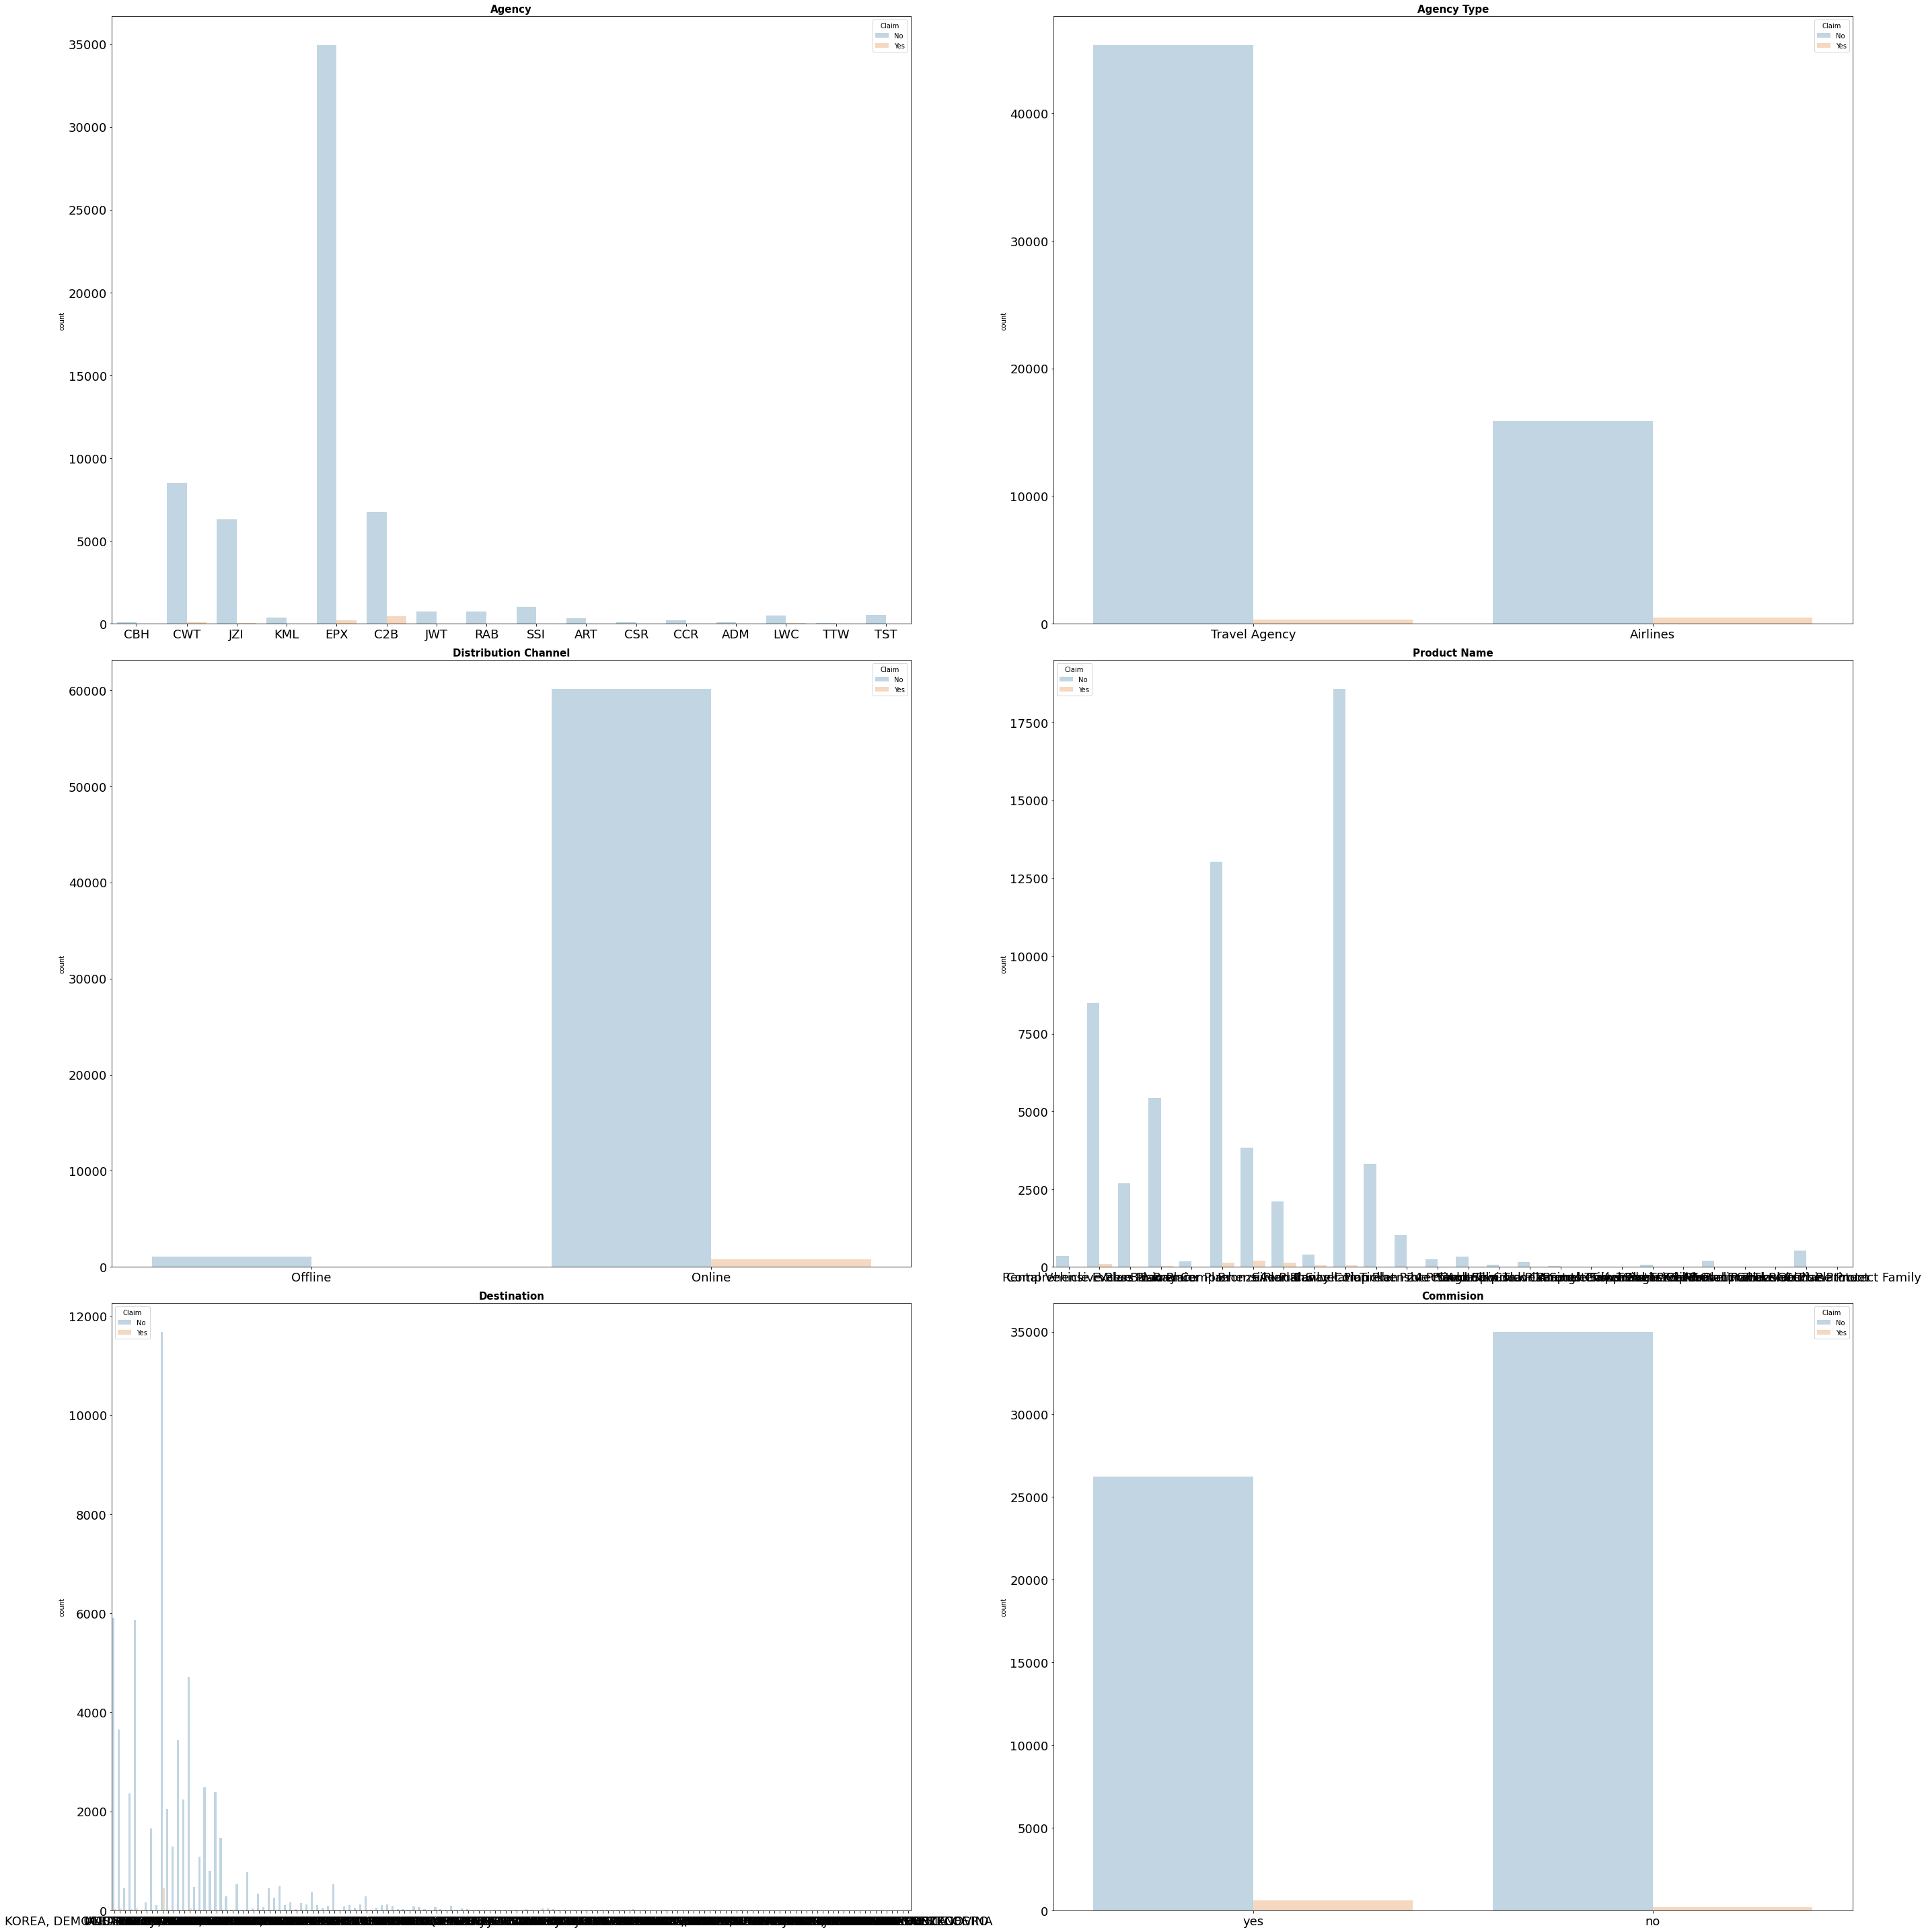

In [203]:
#Vemos visualmente las relaciones entre la variable respuesta y las variables predictoras categóricas

fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (40, 40))
axes = axes.flat

columnas_cat = df_cat.drop("Claim", axis= 1).columns

for i, colum in enumerate(columnas_cat):
    sns.countplot(
        data = df_travel,
        x = colum,
        hue = 'Claim',
        alpha = 0.3,
        ax = axes[i])
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 18)
    axes[i].set_xlabel("")

fig.tight_layout();

In [201]:
#Guardamos los dataframes con los cambios realizados

df_travel.to_pickle('data/df_travel_1.pkl')

In [202]:
df_num.to_pickle('data/df_num_1.pkl')
df_cat.to_pickle('data/df_cat_1.pkl')